In [274]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
from matplotlib import pyplot as plt # data visualization

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


In [102]:
mdf = pd.read_csv("/kaggle/input/playground-series-s4e8/train.csv")

## **Knowing the Data:~**

In [103]:
mdf

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [104]:
mdf.sample(10)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
2057485,2057485,e,6.83,c,t,n,f,e,NaN,w,...,NaN,s,n,u,w,f,f,NaN,d,a
867930,867930,p,2.47,x,g,n,f,a,NaN,w,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,u
271907,271907,e,11.36,x,h,n,t,p,NaN,y,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
367,367,e,8.54,s,NaN,n,f,s,c,u,...,NaN,NaN,u,NaN,NaN,f,f,NaN,l,w
1707772,1707772,e,3.44,x,s,o,f,a,c,e,...,NaN,NaN,o,NaN,NaN,f,f,NaN,g,a
804369,804369,e,2.97,b,y,n,f,NaN,c,k,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
2042647,2042647,p,4.63,o,NaN,w,f,f,f,f,...,NaN,g,w,NaN,NaN,t,f,NaN,p,u
1687748,1687748,e,4.51,x,NaN,w,f,x,c,n,...,b,NaN,n,NaN,w,t,NaN,NaN,g,u
425708,425708,p,3.71,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
1406228,1406228,p,6.52,s,d,o,f,d,c,y,...,NaN,NaN,y,NaN,NaN,f,f,NaN,h,a


In [105]:
mdf.drop(columns="id", inplace=True)

In [106]:
mdf.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [107]:
mdf.columns = mdf.columns.str.replace("-", "_", regex=True)
mdf.rename(columns={"class":"e_label"}, inplace=True)

In [108]:
mdf.isnull().sum()

e_label                       0
cap_diameter                  4
cap_shape                    40
cap_surface              671023
cap_color                    12
does_bruise_or_bleed          8
gill_attachment          523936
gill_spacing            1258435
gill_color                   57
stem_height                   0
stem_width                    0
stem_root               2757023
stem_surface            1980861
stem_color                   38
veil_type               2957493
veil_color              2740947
has_ring                     24
ring_type                128880
spore_print_color       2849682
habitat                      45
season                        0
dtype: int64

In [109]:
mdf[mdf.duplicated()]

,e_label,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,...,stem_root,stem_surface,stem_color,veil_type,veil_color,has_ring,ring_type,spore_print_color,habitat,season


#### //- SUMMARY from above:
* ##### The dataset has **22 columns**, with "id" column set as index. So effectively 21.
* ##### There are **3116945 rows. No duplicate rows** in the dataset.
* ##### Some of the columns have **a lot of null** values.
* ##### **Target column name is "e_label"** meaning Edibility-label.

### **Details of the Numerical Columns:~**

In [110]:
mdf.describe()

,cap_diameter,stem_height,stem_width
count,3.116941e+06,3.116945e+06,3.116945e+06
mean,6.309848e+00,6.348333e+00,1.115379e+01
std,4.657931e+00,2.699755e+00,8.095477e+00
min,3.000000e-02,0.000000e+00,0.000000e+00
25%,3.320000e+00,4.670000e+00,4.970000e+00
50%,5.750000e+00,5.880000e+00,9.650000e+00
75%,8.240000e+00,7.410000e+00,1.563000e+01
max,8.067000e+01,8.872000e+01,1.029000e+02


Text(0.5, 1.0, 'Stem Width')

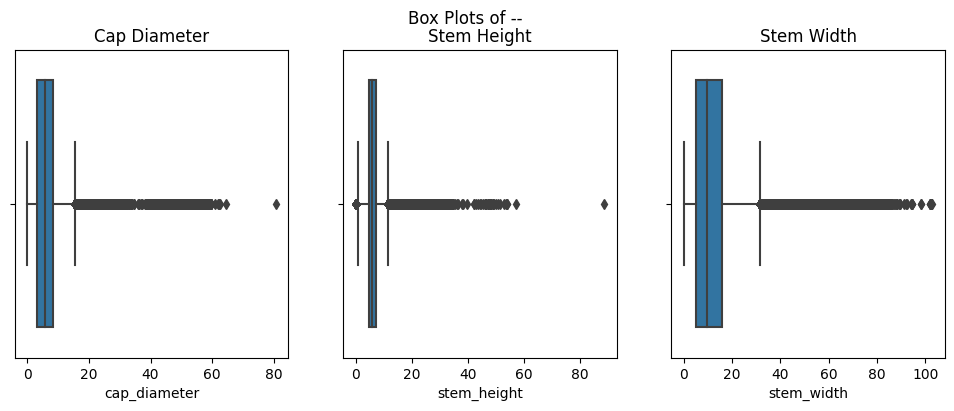

In [111]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
fig.suptitle('Box Plots of --')

# cap_diameter
sns.boxplot(ax=axes[0], x=mdf["cap_diameter"])
axes[0].set_title("Cap Diameter")

# stem_height
sns.boxplot(ax=axes[1], x=mdf["stem_height"])
axes[1].set_title("Stem Height")

# stem_width
sns.boxplot(ax=axes[2], x=mdf["stem_width"])
axes[2].set_title("Stem Width")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Stem Width')

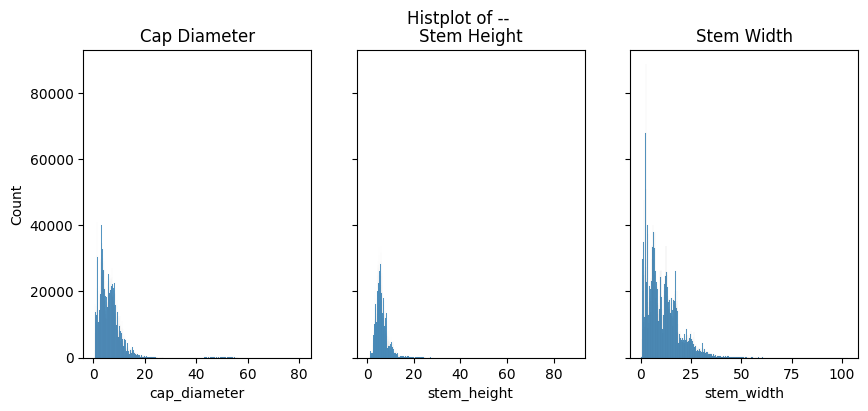

In [112]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True)
fig.suptitle('Histplot of --')

# cap_diameter
sns.histplot(x=mdf["cap_diameter"], ax=axes[0])
axes[0].set_title("Cap Diameter")

# stem_height
sns.histplot(x=mdf["stem_height"], ax=axes[1])
axes[1].set_title("Stem Height")

# stem_width
sns.histplot(x=mdf["stem_width"], ax=axes[2])
axes[2].set_title("Stem Width")

### **Details of the Categorical Columns:~**

In [113]:
mdf.describe(include="object")

,e_label,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_root,stem_surface,stem_color,veil_type,veil_color,has_ring,ring_type,spore_print_color,habitat,season
count,3116945,3116905,2445922,3116933,3116937,2593009,1858510,3116888,359922,1136084,3116907,159452,375998,3116921,2988065,267263,3116900,3116945
unique,2,74,83,78,26,78,48,63,38,60,59,22,24,23,40,32,52,4
top,p,x,t,n,f,a,c,w,b,s,w,u,w,f,f,k,d,a
freq,1705396,1436026,460777,1359542,2569743,646034,1331054,931538,165801,327610,1196637,159373,279070,2368820,2477170,107310,2177573,1543321


e_label
p    1705396
e    1411549
Name: count, dtype: int64

<Axes: title={'center': 'Proportion of e & p'}>

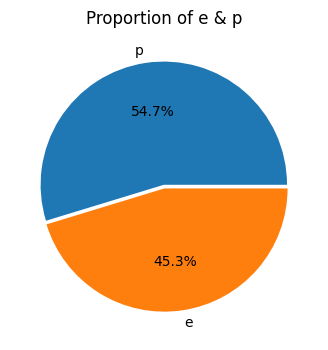

In [114]:
display(mdf.e_label.value_counts())
mdf.e_label.value_counts().plot(kind="pie", title="Proportion of e & p", ylabel="",
                                y=mdf.e_label.value_counts(), figsize=(4,4),
                                autopct="%1.01f%%", explode=(0.01,0.02))

In [115]:
mdf.shape

(3116945, 21)

In [116]:
mdf.cap_shape.value_counts()

cap_shape
x        1436026
f         676238
s         365146
b         318646
o         108835
          ...   
12.62          1
5.15           1
19.04          1
49.21          1
19.06          1
Name: count, Length: 74, dtype: int64

In [117]:
mdf.cap_shape.unique()

array(['f', 'x', 'p', 'b', 'o', 'c', 's', 'd', 'e', 'n', nan, 'w', 'k',
       'l', '19.29', '5 f', 't', 'g', 'z', 'a', '2.85', '7 x', 'r', 'u',
       '3.55', 'is s', 'y', '4.22', '3.6', '21.56', 'i', '6 x', '24.16',
       '8', 'm', 'ring-type', '10.13', 'is p', '7.43', 'h', '0.82',
       '10.46', '2.77', '2.94', '12.62', '5.15', '19.04', '4.97', '49.21',
       'b f', '9.13', '1.66', '3.37', '7.21', '3.25', '11.12', '3 x',
       '4.3', '7.41', '6.21', '8.29', '54.78', '20.25', '3.52', '3.04',
       '2.63', '3.91', '6.44', '8.3', '7.6', '17.44', '4.33', '2.82',
       '6.53', '19.06'], dtype=object)

##### In cap_shape there are some garbage values, probably are wringly imputed. Let's check how much data are such.

In [118]:
mdf[mdf.cap_shape.isin(list("fxpbocsdenwkltgzaruyimh")+[np.nan])].shape

(3116890, 21)

##### So there are **(3116945-3116890) = 55** such data. We can remove these.

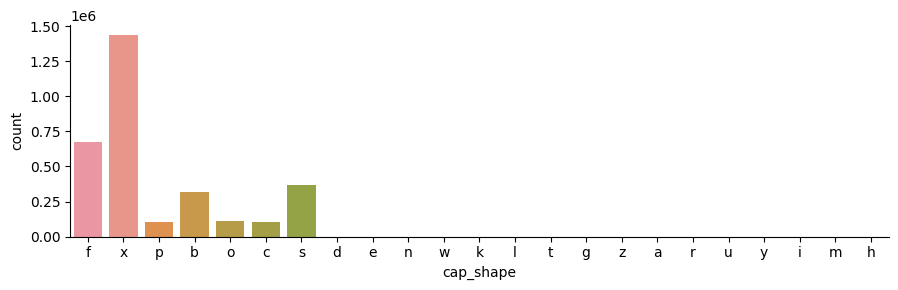

In [119]:
mdf = mdf[mdf.cap_shape.isin(list("fxpbocsdenwkltgzaruyimh")+[np.nan])]
sns.catplot(mdf, kind="count", x ="cap_shape", height=3, aspect=3)

##### Proportion wise only 7 entries like **f,x,p,b,o,c,s have visible spread over the cap_shape series.**

In [120]:
mdf.shape

(3116890, 21)

In [121]:
mdf.cap_surface.value_counts()

cap_surface
t        460771
s        384966
y        327816
h        284457
g        263720
          ...  
1.42          1
has h         1
10.83         1
8.96          1
0.87          1
Name: count, Length: 83, dtype: int64

##### The same is for cap_surface too. So have done the same operation and dropped those garbage entries.

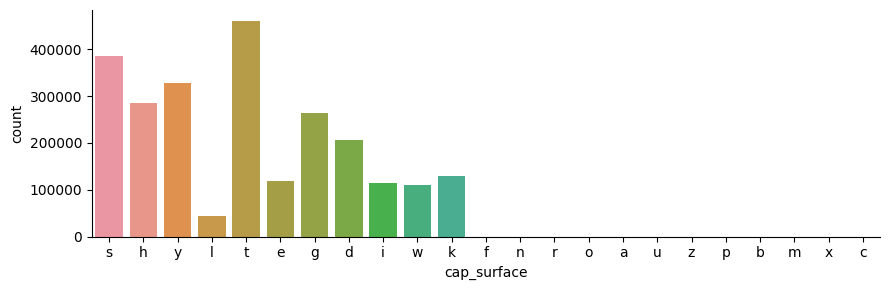

In [122]:
mdf = mdf[mdf.cap_surface.isin(list("shyltegdiwkfnroauzpbmxc")+[np.nan])]
sns.catplot(mdf, kind="count", x ="cap_surface", height=3, aspect=3)

In [123]:
mdf.shape #73 rows dropped in this process.

(3116817, 21)

In [124]:
mdf.cap_color.value_counts()

cap_color
n             1359484
y              386606
w              379420
g              210820
e              197281
               ...   
3.95                1
6.59                1
5.25                1
veil-color          1
9.02                1
Name: count, Length: 78, dtype: int64

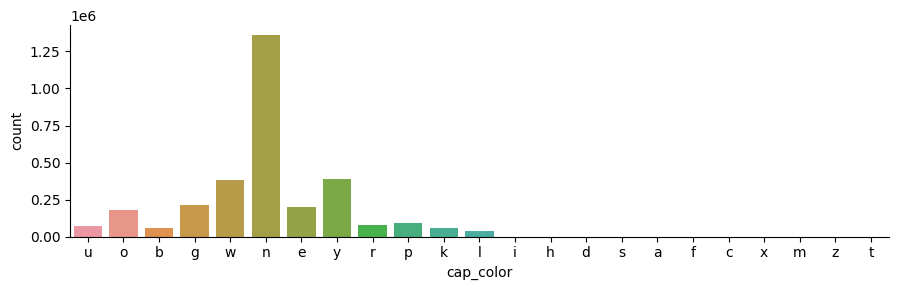

In [125]:
mdf = mdf[mdf.cap_color.isin(list("uobgwneyrpklihdsafcxmzt")+[np.nan])]
sns.catplot(mdf, kind="count", x ="cap_color", height=3, aspect=3)

In [126]:
mdf.shape #72 records removed

(3116745, 21)

In [127]:
mdf.does_bruise_or_bleed.value_counts()

does_bruise_or_bleed
f           2569572
t            547056
w                14
c                11
h                 9
a                 7
b                 7
x                 7
y                 7
k                 6
s                 6
e                 4
l                 4
p                 4
d                 4
g                 3
z                 3
o                 3
i                 2
n                 2
r                 1
has-ring          1
3.43              1
4.42              1
2.9               1
u                 1
Name: count, dtype: int64

##### The column name suggests that it should be a Binary column. Checked on the official website as well, which confirms the same as well. Hence kept only t & f, as in True and False.

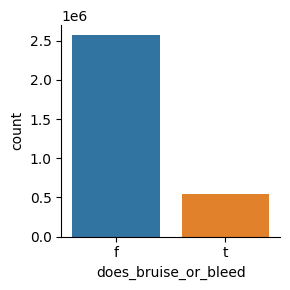

In [128]:
mdf = mdf[mdf.does_bruise_or_bleed.isin(list("tf"))]
sns.catplot(data = mdf, x='does_bruise_or_bleed', kind="count", height=3, aspect=1)

In [129]:
mdf.shape #117 records dropped

(3116628, 21)

'gill_attachment' processed. 60 records removed
'gill_spacing' processed. 31 records removed
'gill_color' processed. 67 records removed
'stem_root' processed. 15 records removed
'stem_surface' processed. 47 records removed
'stem_color' processed. 40 records removed
'veil_type' processed. 3 records removed
'veil_color' processed. 3 records removed
'has_ring' processed. 2 records removed
'ring_type' processed. 27 records removed
'spore_print_color' processed. 11 records removed
'habitat' processed. 38 records removed


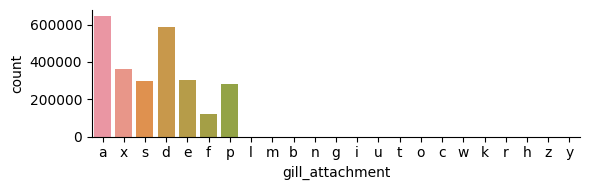

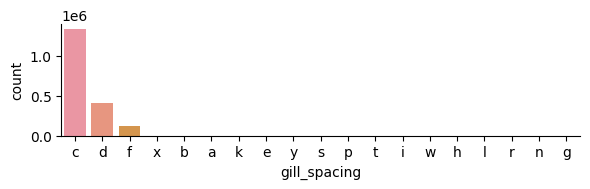

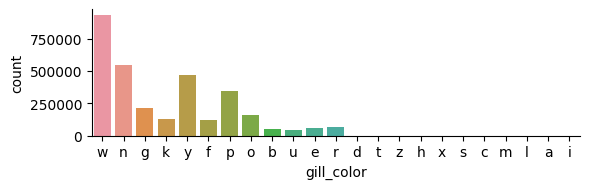

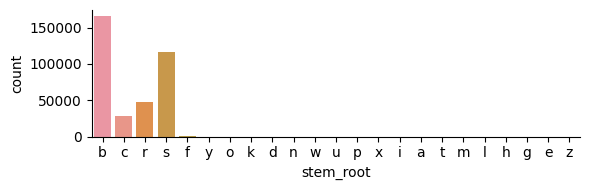

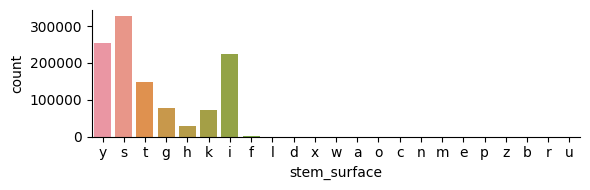

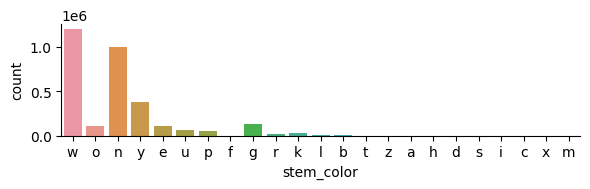

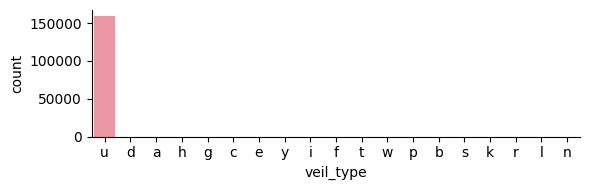

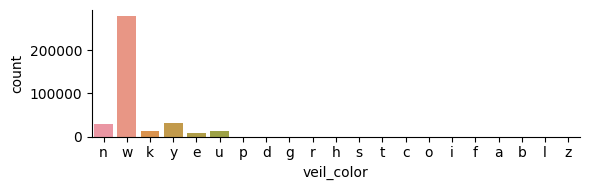

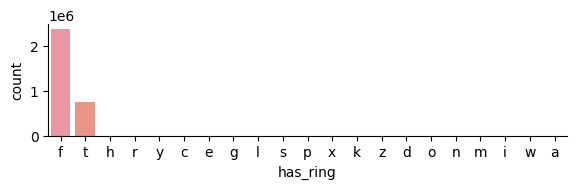

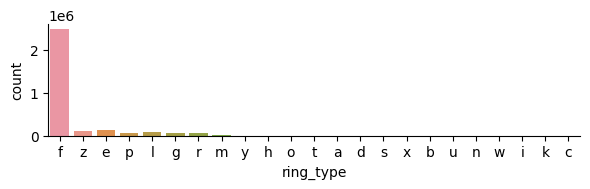

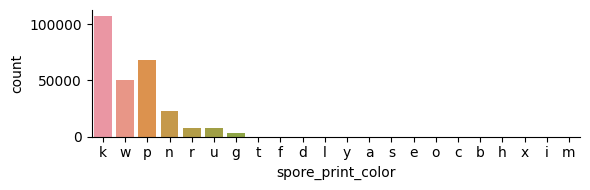

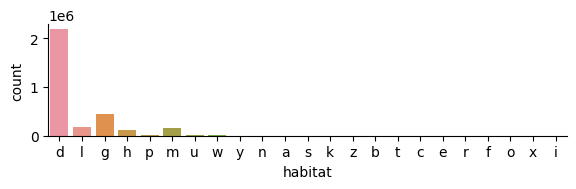

In [130]:
# list('abcdefghijklmnopqrstuvwxyz')
atoz = [chr(i) for i in range(ord('a'), ord('z')+1)]

def non_alpha_categories_removal(df, col, atoz):
    len_before = df.shape[0]
    df = df[df[col].isin(atoz+[np.nan])]
    len_after = df.shape[0]
    print(f"'{col}' processed. {len_before-len_after} records removed")
    sns.catplot(df, kind="count", x =col, height=2, aspect=3)
    return df


for col in ['gill_attachment', 'gill_spacing', 'gill_color',
            'stem_root', 'stem_surface', 'stem_color', 'veil_type', 
            'veil_color', 'has_ring', 'ring_type', 'spore_print_color', 'habitat']:
    mdf = non_alpha_categories_removal(mdf,col, atoz)

In [131]:
mdf.shape

(3116284, 21)

season
a    1542963
u    1153338
w     278150
s     141833
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of Season'}>

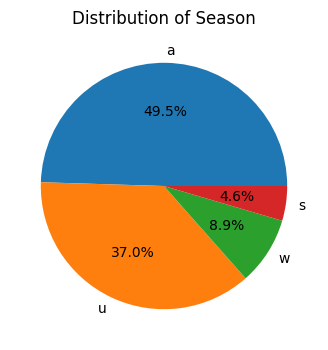

In [132]:
display(mdf.season.value_counts())
mdf.season.value_counts().plot(figsize=(7,4), kind="pie", y=mdf.season.value_counts(),
                              autopct = "%1.01f%%", title="Distribution of Season", ylabel="")

#### //- SUMMARY from above:
1. ##### The **numerical columns have a lot of outliers.** Stem height column is normally distributed, while the others are right-skewed.
2. ##### The **target column is almost equally distributed** among Edible and Poisonous
3. ##### Most of the other **categorical columns had some garbage values** like numerical records or class name and so. So, have removed these garbage records **(about 700 rows dropped).** Still, *not all the alphabetical values are having significant spreads across respective columns.* So need to verify their correctness to decide whether to keep them or not.
4. ##### About **4 Mushrooms in every 5 don't have bruising or bleeding.**
5. ##### There are **4 different seasons** spreading across the dataset, which are most probably **"Autumn", "Summer", "Winter", and "Spring".** --> Spring occurs the least among all.

## **Data Cleaning & Processing:~**

In [34]:
temp = mdf.copy()

In [217]:
mdf = temp

In [201]:
mdf

,e_label,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,...,stem_root,stem_surface,stem_color,veil_type,veil_color,has_ring,ring_type,spore_print_color,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,12.14,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,e,10.88,s,NaN,w,t,d,c,p,6.65,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,p,7.82,x,e,e,f,a,NaN,w,9.51,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,e,9.45,p,i,n,t,e,NaN,p,9.13,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


### **Outlier Removal:**

#### Previuosly we had concluded that the numerical columns had good amount of outliers. Let's try to fix those now.

In [55]:
num_cols = ['cap_diameter', 'stem_height', 'stem_width']

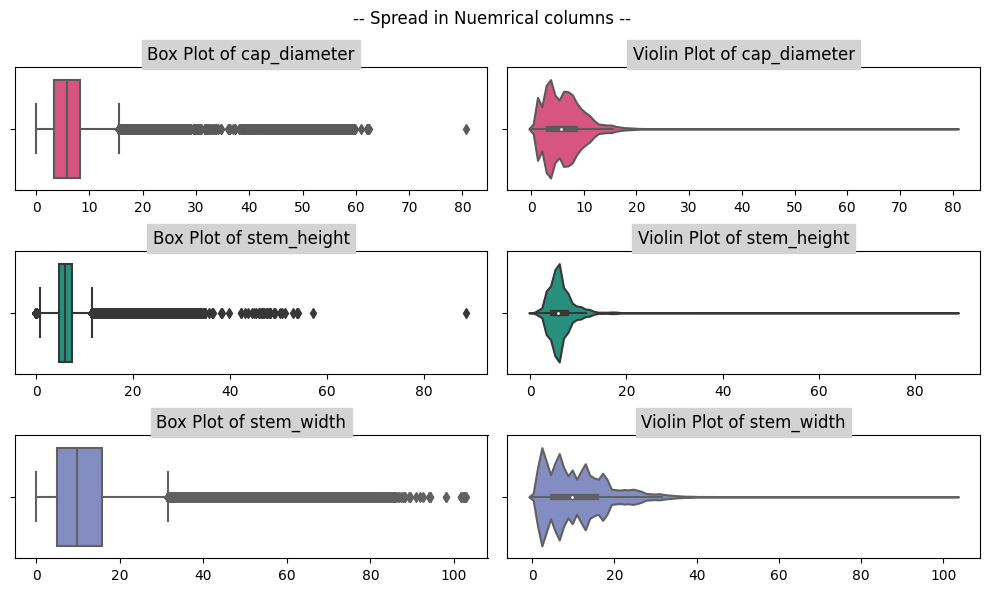

In [218]:
fig, axes = plt.subplots(3, 2, figsize=(10, 6), sharey=True)
fig.suptitle('-- Spread in Nuemrical columns -- ')
color_map = ['#ec407a','#16a085', '#7986cb']

for n,col in enumerate(num_cols):
    sns.boxplot(ax=axes[n][0], x=mdf[col], color=color_map[n])
    axes[n][0].set_title(f"Box Plot of {col}", backgroundcolor='lightgrey')
    axes[n][0].set_xlabel("")
    
    sns.violinplot(ax=axes[n][1], x=mdf[col],  color=color_map[n])
    axes[n][1].set_title(f"Violin Plot of {col}", backgroundcolor='lightgrey')
    axes[n][1].set_xlabel("")
    
fig.tight_layout()

In [219]:
#Outlier Removal using IQR Method

for col in num_cols:
    Q1 = mdf[col].quantile(.25)
    Q3 = mdf[col].quantile(.75)
    IQR = Q3-Q1
    
    LL = Q1-1.5*IQR
    UL = Q3+1.5*IQR
    print(f"{mdf[(mdf[col]<LL) | (mdf[col]>UL)].shape[0]} rows are removed:")
    mdf = mdf[(mdf[col]>=LL) & (mdf[col]<=UL)]


76102 rows are removed:
124790 rows are removed:
46957 rows are removed:


In [220]:
mdf.shape

(2868431, 21)

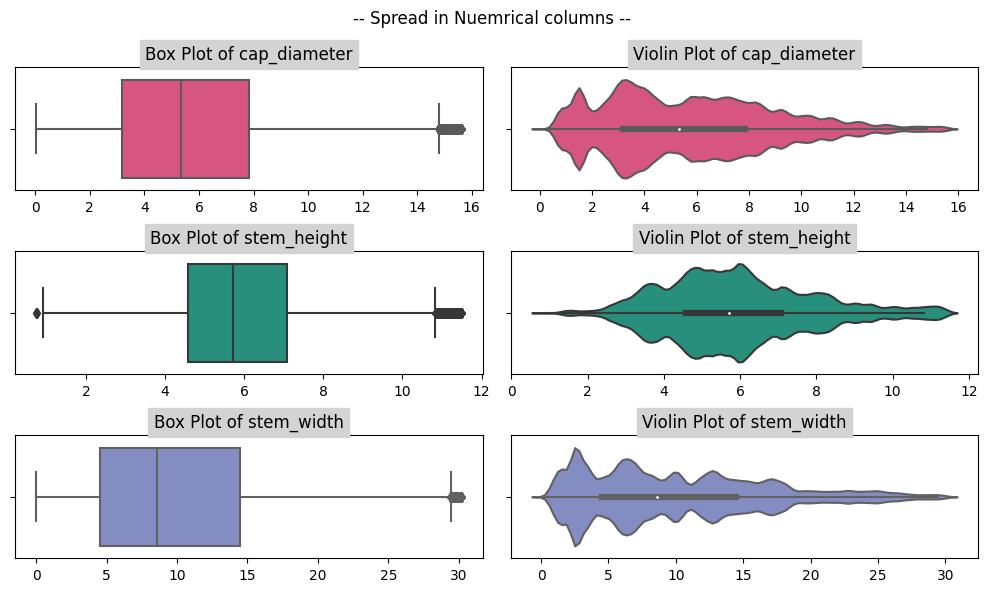

In [221]:
fig, axes = plt.subplots(3, 2, figsize=(10, 6), sharey=True)
fig.suptitle('-- Spread in Nuemrical columns -- ')
color_map = ['#ec407a','#16a085', '#7986cb']

for n,col in enumerate(num_cols):
    sns.boxplot(ax=axes[n][0], x=mdf[col], color=color_map[n])
    axes[n][0].set_title(f"Box Plot of {col}", backgroundcolor='lightgrey')
    axes[n][0].set_xlabel("")
    
    sns.violinplot(ax=axes[n][1], x=mdf[col],  color=color_map[n])
    axes[n][1].set_title(f"Violin Plot of {col}", backgroundcolor='lightgrey')
    axes[n][1].set_xlabel("")
    
fig.tight_layout()

### **Handling Null/ Missing Values:**

In [226]:
mdf.isnull().mean().round(4) * 100

e_label                  0.00
cap_diameter             0.00
cap_shape                0.00
cap_surface             22.40
cap_color                0.00
does_bruise_or_bleed     0.00
gill_attachment         17.13
gill_spacing            38.78
gill_color               0.00
stem_height              0.00
stem_width               0.00
stem_root               89.62
stem_surface            64.55
stem_color               0.00
veil_type               96.24
veil_color              88.82
has_ring                 0.00
ring_type                4.13
spore_print_color       91.45
habitat                  0.00
season                   0.00
dtype: float64

<Axes: title={'center': 'Percentage of null values in each columns'}>

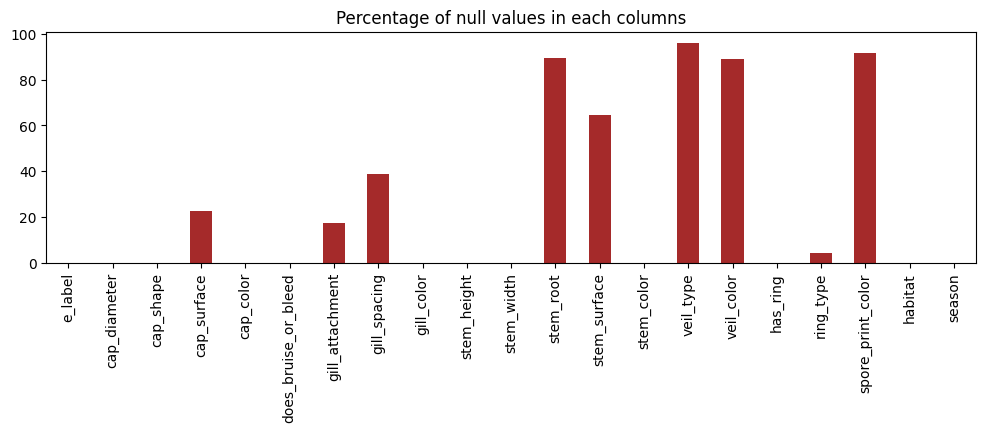

In [223]:
(mdf.isnull().mean().round(4) * 100).plot.bar(title="Percentage of null values in each columns",figsize=(12,3), color='brown')

#### So, from the above diagram, it's clear that a few columns like `"stem_root"`, `"stem_surface"`, `"veil_type"`, `"veil_color"`, and `"spore_print_color"` **has 60-96% data missing.** 

#### And, **we should not impute these many records**. 
> Logically, when there are more than 50% of data missing and there's no known reason of this, we should not fill in any values, and drop such columns. Because in that case more than half of things we are doing don't have any conclusive evidence of why we are doing.
#### So we will remove this columns.


In [227]:
# Let's drop any columns that has more than 50% null value
threshold_na = len(mdf) * 0.50

# Drop columns with more than 50% missing values
mdf = mdf.dropna(thresh=threshold_na, axis=1)

In [39]:
mdf.sample(2)

,e_label,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,stem_width,stem_color,has_ring,ring_type,habitat,season
2461830,e,3.20,x,s,w,f,d,d,w,2.93,5.92,w,f,f,g,w
379605,e,6.33,s,NaN,n,f,d,c,w,5.00,8.12,w,f,f,h,u


#### Four other columns namely, `"cap_surface"`, `"gill_attachment"`, `"gill_spacing"` & `"ring_type"` has visible null amount. For now we can impute all missing values in these columns as "unk", as in "Unknown". 
#### Later on these columns can be judged based on correlation with target. 

In [228]:
mdf[["cap_surface", "gill_attachment", "gill_spacing", "ring_type"]]=mdf[["cap_surface", "gill_attachment", "gill_spacing", "ring_type"]].fillna("unk")

/tmp/ipykernel_1248/2228491189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf[["cap_surface", "gill_attachment", "gill_spacing", "ring_type"]]=mdf[["cap_surface", "gill_attachment", "gill_spacing", "ring_type"]].fillna("unk")


In [229]:
mdf[["cap_surface", "gill_attachment", "gill_spacing", "ring_type"]].isnull().sum()

cap_surface        0
gill_attachment    0
gill_spacing       0
ring_type          0
dtype: int64

In [230]:
mdf.ring_type.value_counts()

ring_type
f      2302297
unk     118450
z       110560
e        97935
r        64896
l        62193
p        60244
g        51321
m          218
t           91
d           32
n           31
x           28
b           22
y           21
k           16
s           15
a           13
h           12
w           10
u            9
c            8
o            5
i            4
Name: count, dtype: int64

In [231]:
mdf.isnull().sum()

e_label                  0
cap_diameter             0
cap_shape               38
cap_surface              0
cap_color               12
does_bruise_or_bleed     0
gill_attachment          0
gill_spacing             0
gill_color              51
stem_height              0
stem_width               0
stem_color              35
has_ring                23
ring_type                0
habitat                 41
season                   0
dtype: int64

#### As a result of the above operation, we have successfully handled most of the null values. Rest of the columns have very few null entries (near to 0%). We can drop these.

In [232]:
mdf.dropna(inplace=True)
mdf.isnull().sum()

/tmp/ipykernel_1248/2935138904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf.dropna(inplace=True)


e_label                 0
cap_diameter            0
cap_shape               0
cap_surface             0
cap_color               0
does_bruise_or_bleed    0
gill_attachment         0
gill_spacing            0
gill_color              0
stem_height             0
stem_width              0
stem_color              0
has_ring                0
ring_type               0
habitat                 0
season                  0
dtype: int64

### **Removing unwanted/rare data:**

In [233]:
mdf.nunique()

e_label                    2
cap_diameter            1526
cap_shape                 23
cap_surface               24
cap_color                 23
does_bruise_or_bleed       2
gill_attachment           24
gill_spacing              20
gill_color                23
stem_height             1051
stem_width              2972
stem_color                23
has_ring                  20
ring_type                 24
habitat                   23
season                     4
dtype: int64

#### Earlier we had seen than all these categorical columns have many unique values in them. And most of those have very low spread in the dataset. 
#### The above output shows that apart from the target column, three numerical columns & 2 other categorical columns, all other have more than 20 unique values. This much variation will confuse both us and our ML algo. 
####  

#### What are we gonna do then? 
> Let's consider only those unique values that have atleast 5% spread in the respective columns. The rest of them might have been wrongly imputed or are rare. We can change those to `Other`

In [234]:
mdf.cap_shape.value_counts()/mdf.cap_shape.count()*100 #will consider till cap_shape='b', rest-->'other'

cap_shape
x    46.717472
f    21.750828
s    12.140654
b    10.133040
c     3.374798
o     3.049685
p     2.819717
d     0.001848
e     0.001743
n     0.001220
t     0.001116
r     0.001011
y     0.000976
g     0.000976
a     0.000872
u     0.000837
w     0.000802
z     0.000697
l     0.000628
i     0.000453
k     0.000349
h     0.000209
m     0.000070
Name: count, dtype: float64

In [235]:
percent_counts = mdf.cap_shape.value_counts()/mdf.cap_shape.count()*100
idx = percent_counts[percent_counts<5].index
print(idx)

mdf.loc[mdf.cap_shape.isin(idx), 'cap_shape'] = "other"
print(mdf.cap_shape.value_counts()/mdf.cap_shape.count()*100)

Index(['c', 'o', 'p', 'd', 'e', 'n', 't', 'r', 'y', 'g', 'a', 'u', 'w', 'z',
       'l', 'i', 'k', 'h', 'm'],
      dtype='object', name='cap_shape')
cap_shape
x        46.717472
f        21.750828
s        12.140654
b        10.133040
other     9.258006
Name: count, dtype: float64


#### This makes the change as we indended for. But **if in any case, the percentage of 'other' too is less than 5%,** we can drop them.

In [236]:
for col in ['cap_surface', 'cap_color', 'gill_attachment', 'gill_spacing', 'gill_color',
            'stem_color', 'has_ring', 'ring_type', 'habitat']:

    percent_counts = mdf[col].value_counts()/mdf[col].count()*100
    idx = percent_counts[percent_counts<5].index

    if percent_counts[percent_counts<5].sum()>=5:
        mdf.loc[mdf[col].isin(idx), col] = "other"
        print(f"Rare categories in '{col}' column are classed as 'other'")
    
    else:
        mdf = mdf.loc[~mdf[col].isin(idx)]
        print(f"Rare categories in '{col}' column are dropped")    
    

Rare categories in 'cap_surface' column are classed as 'other'
Rare categories in 'cap_color' column are classed as 'other'
Rare categories in 'gill_attachment' column are dropped
Rare categories in 'gill_spacing' column are dropped
Rare categories in 'gill_color' column are classed as 'other'
Rare categories in 'stem_color' column are classed as 'other'
Rare categories in 'has_ring' column are dropped
Rare categories in 'ring_type' column are classed as 'other'
Rare categories in 'habitat' column are classed as 'other'


In [237]:
mdf.nunique()

e_label                    2
cap_diameter            1526
cap_shape                  5
cap_surface                8
cap_color                  7
does_bruise_or_bleed       2
gill_attachment            7
gill_spacing               3
gill_color                 7
stem_height             1047
stem_width              2972
stem_color                 4
has_ring                   2
ring_type                  2
habitat                    5
season                     4
dtype: int64

#### Here's information on most frequest values of each categorical columns

* **cap-shape (n):** bell=b, convex=x, flat=f, sunken=s,
* **cap-color (n):** brown=n, gray=g, white=w, yellow=y, orange=o, red=e,
* **does-bruise-or-bleed (n):** true=t,false=f,
* **gill-spacing (n):** close=c, distant=d,
* **gill-color (n):**  brown=n, white=w, gray=g, pink=p, yellow=y, orange=o,
* **stem-color (n):**  brown=n, white=w, yellow=y, 
* **has-ring (n):** true=t, false=f,
* **ring-type (n):** flaring=f,
* **habitat (n):** grasses=g, leaves=l, meadows=m, woods=d,
* **season (n):** spring=s, summer=u, autumn=a, winter=w

In [238]:
# Category name maping 

mdf.cap_shape = mdf.cap_shape.replace({'b':"bell", 'x':"convex", 'f':"flat", 's':"sunken"})
mdf.cap_color = mdf.cap_color.replace({'n':"brown", 'g':"gray", 'w':"white", 'y':"yellow", 'o':"orange", 'e':"red"})
mdf.gill_spacing = mdf.gill_spacing.replace({'c':"close", 'd':"distant"})
mdf.gill_color = mdf.gill_color.replace({'n':"brown", 'g':"gray", 'w':"white", 'p':"pink", 'y':"yellow", 'o':"orange"})
mdf.stem_color = mdf.stem_color.replace({'n':"brown", 'w':"white", 'y':"yellow"})
mdf.ring_type = mdf.ring_type.replace({'f':"flaring"})
mdf.habitat = mdf.habitat.replace({'g':"grasses", 'l':"leaves", 'm':"meadows", 'd':"woods"})
mdf.season = mdf.season.replace({'s':"spring", 'u':"summer", 'w':"winter", 'a':"autumn"})

In [242]:
mdf.sample(2)

,e_label,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,stem_width,stem_color,has_ring,ring_type,habitat,season
2726647,p,2.71,flat,unk,brown,f,x,close,pink,8.37,3.83,other,f,flaring,leaves,summer
2268285,p,4.91,flat,s,yellow,f,a,close,yellow,5.80,7.70,other,f,flaring,grasses,summer


In [ ]:
categorical_cols= ['cap_shape', 'cap_surface', 'cap_color', 'gill_attachment', 'gill_spacing', 'gill_color', 
                   'stem_color', 'has_ring', 'ring_type', 'does_bruise_or_bleed', 'habitat', 'season' ]

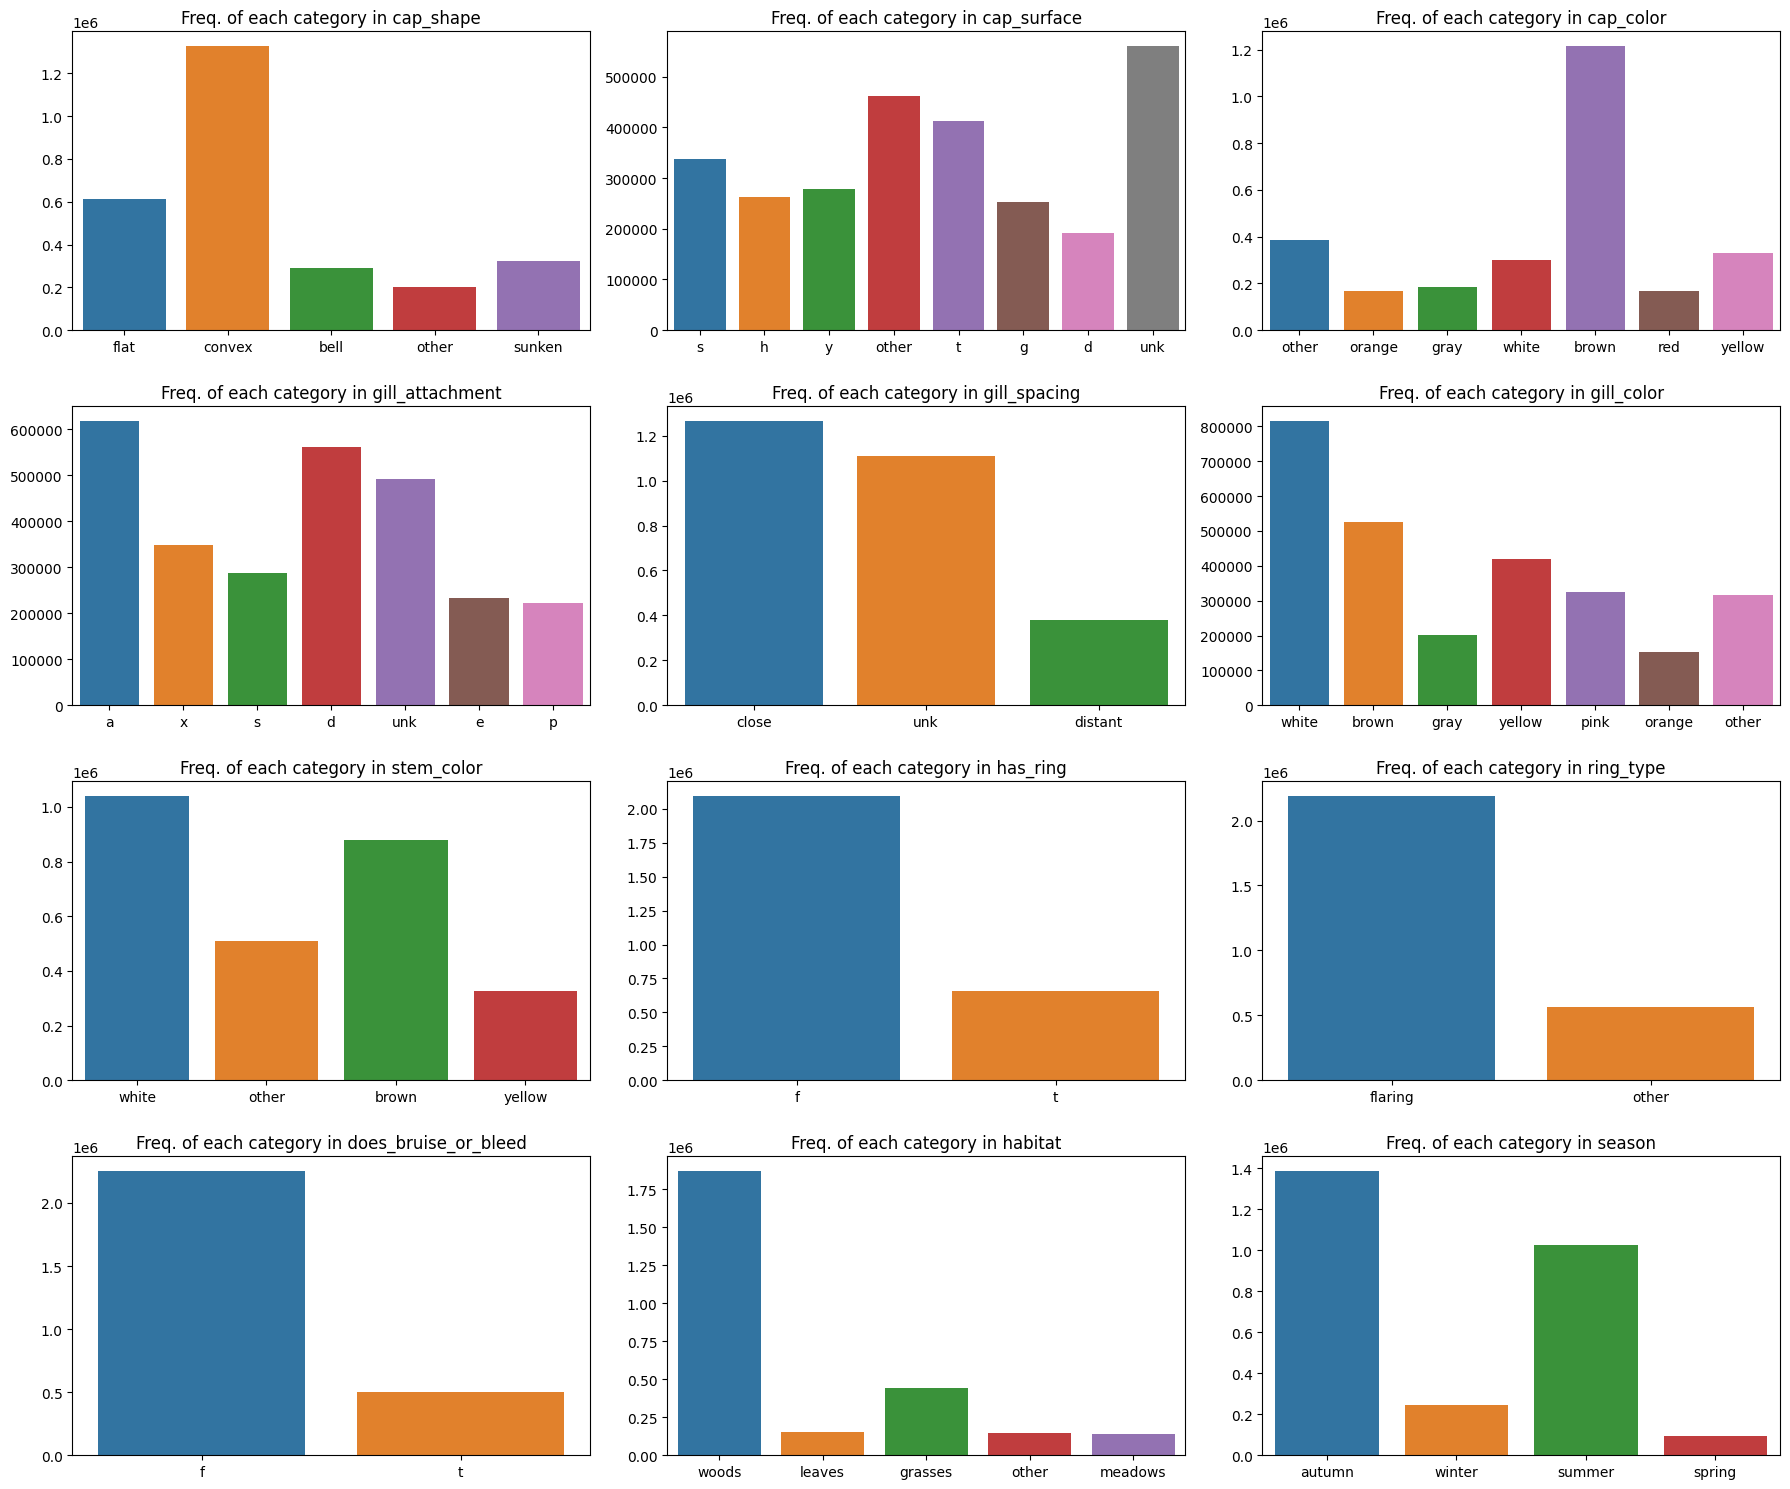

In [243]:
cat_cols = np.reshape(categorical_cols, (4,3))

# for col in categorical_cols:
f, axs = plt.subplots(4, 3, figsize=(18, 15))

for n, col in enumerate(cat_cols):
    sns.countplot(ax=axs[n,0], data=mdf, x =col[0])
    axs[n,0].set_title(f"Freq. of each category in {col[0]}")
    axs[n,0].set_xlabel("")
    axs[n,0].set_ylabel("")
    
    sns.countplot(ax=axs[n,1], data=mdf, x =col[1])
    axs[n,1].set_title(f"Freq. of each category in {col[1]}")
    axs[n,1].set_xlabel("")
    axs[n,1].set_ylabel("")
    
    sns.countplot(ax=axs[n,2], data=mdf, x =col[2])
    axs[n,2].set_title(f"Freq. of each category in {col[2]}")
    axs[n,2].set_xlabel("")
    axs[n,2].set_ylabel("")

f.tight_layout()

In [244]:
mdf.shape

(2757576, 16)

#### //- SUMMARY from above:
1. ##### Outliers from the numerical columns are removed. **Around 2.5 lac records (~ 8% of whole) dropped.**
2. ##### **"stem_root", "stem_surface", "veil_type", "veil_color", and "spore_print_color"** columns had more than 50% null values. Hence those columns were *dropped.* 
3. ##### Null values in **"cap_surface", "gill_attachment", "gill_spacing" & "ring_type"** columns were *imputed with "unk" as in "Unknown".*
4. ##### In other categorical columns... *only those categories are kept that had a **spread of 5% or more** in the respective columns. If not, all are combined to form a new category as "Other".*
5. ##### **Categories were replaced with their more convenient names** with reference from original website.
6. ##### As of now there are **16 columns** *(1 target column, 3 Numerical ones, 3 binary & rest of those are nominal ones)*. Around **27.5 lac rows present.**

### **Bi-variate & Multivariate Analysis:**

In [246]:
mdf

,e_label,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,stem_width,stem_color,has_ring,ring_type,habitat,season
0,e,8.80,flat,s,other,f,a,close,white,4.51,15.39,white,f,flaring,woods,autumn
1,p,4.51,convex,h,orange,f,a,close,brown,4.79,6.48,other,t,other,woods,winter
2,e,6.94,flat,s,other,f,x,close,white,6.85,9.93,brown,f,flaring,leaves,winter
3,e,3.88,flat,y,gray,f,s,unk,gray,4.16,6.53,white,f,flaring,woods,summer
4,e,5.85,convex,other,white,f,d,unk,white,3.37,8.36,white,f,flaring,grasses,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116938,p,9.08,sunken,t,other,t,d,close,pink,8.07,14.70,other,t,flaring,woods,autumn
3116941,e,10.88,sunken,unk,white,t,d,close,pink,6.65,26.97,white,f,flaring,woods,summer
3116942,p,7.82,convex,other,red,f,a,unk,white,9.51,11.06,yellow,t,other,woods,autumn
3116943,e,9.45,other,other,brown,t,e,unk,pink,9.13,17.77,white,t,other,woods,summer


<Axes: xlabel='cap_diameter', ylabel='Density'>

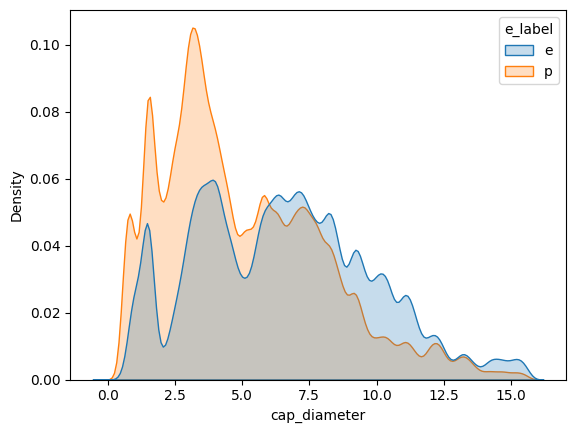

In [294]:
sns.kdeplot(data =mdf, fill=True, x='cap_diameter', hue='e_label')

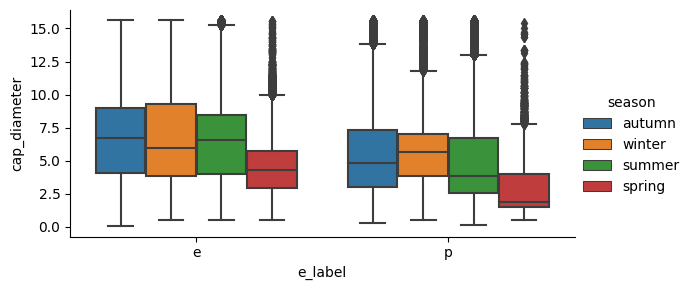

In [265]:
sns.catplot(kind='box', data =mdf, x='e_label', y='cap_diameter', hue='season', height=3, aspect=2)

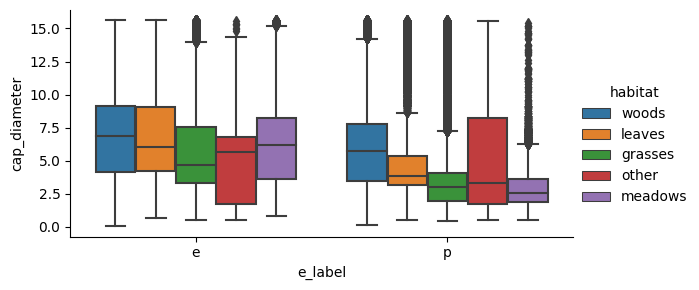

In [267]:
sns.catplot(kind='box', data =mdf, x='e_label', y='cap_diameter', hue='habitat', height=3, aspect=2)

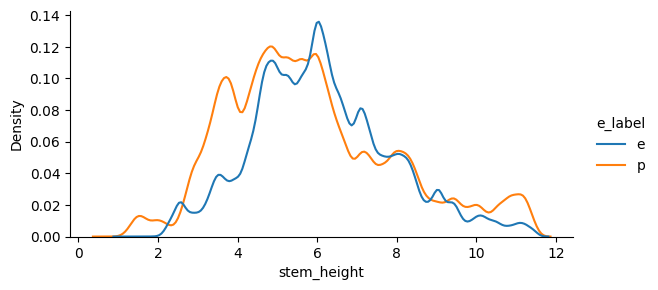

In [287]:
sns.displot(data =mdf, kind='kde', x='stem_height', hue='e_label', height=3, aspect=2)

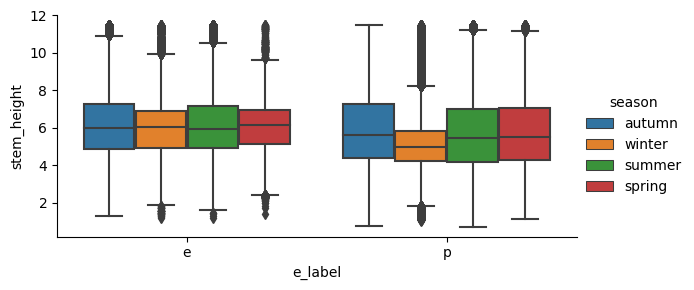

In [268]:
sns.catplot(kind='box', data =mdf, x='e_label', y='stem_height', hue='season', height=3, aspect=2)

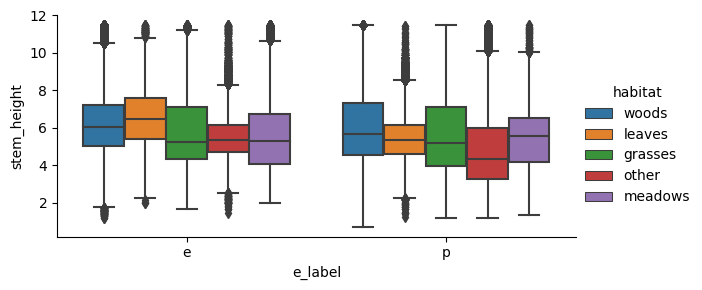

In [269]:
sns.catplot(kind='box', data =mdf, x='e_label', y='stem_height', hue='habitat', height=3, aspect=2)

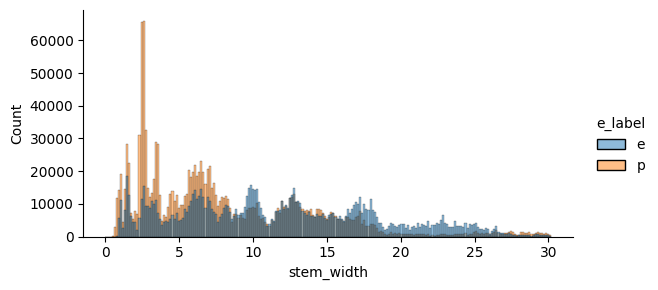

In [288]:
sns.displot(data =mdf, x='stem_width', hue='e_label', height=3, aspect=2)

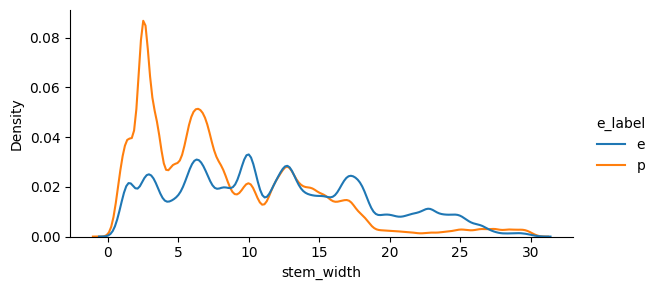

In [292]:
sns.displot(data =mdf, kind='kde', x='stem_width', hue='e_label', height=3, aspect=2)

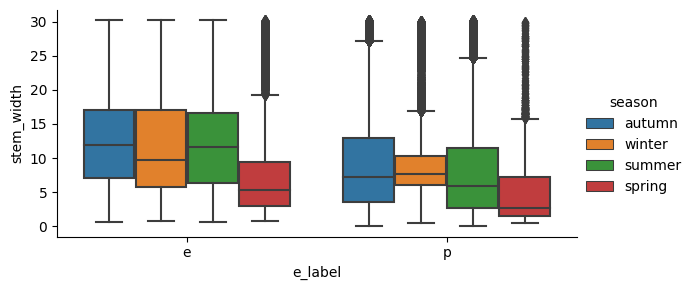

In [270]:
sns.catplot(kind='box', data =mdf, x='e_label', y='stem_width', hue='season', height=3, aspect=2)

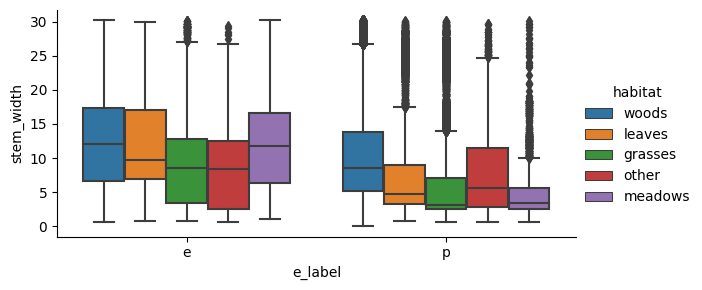

In [271]:
sns.catplot(kind='box', data =mdf, x='e_label', y='stem_width', hue='habitat', height=3, aspect=2)

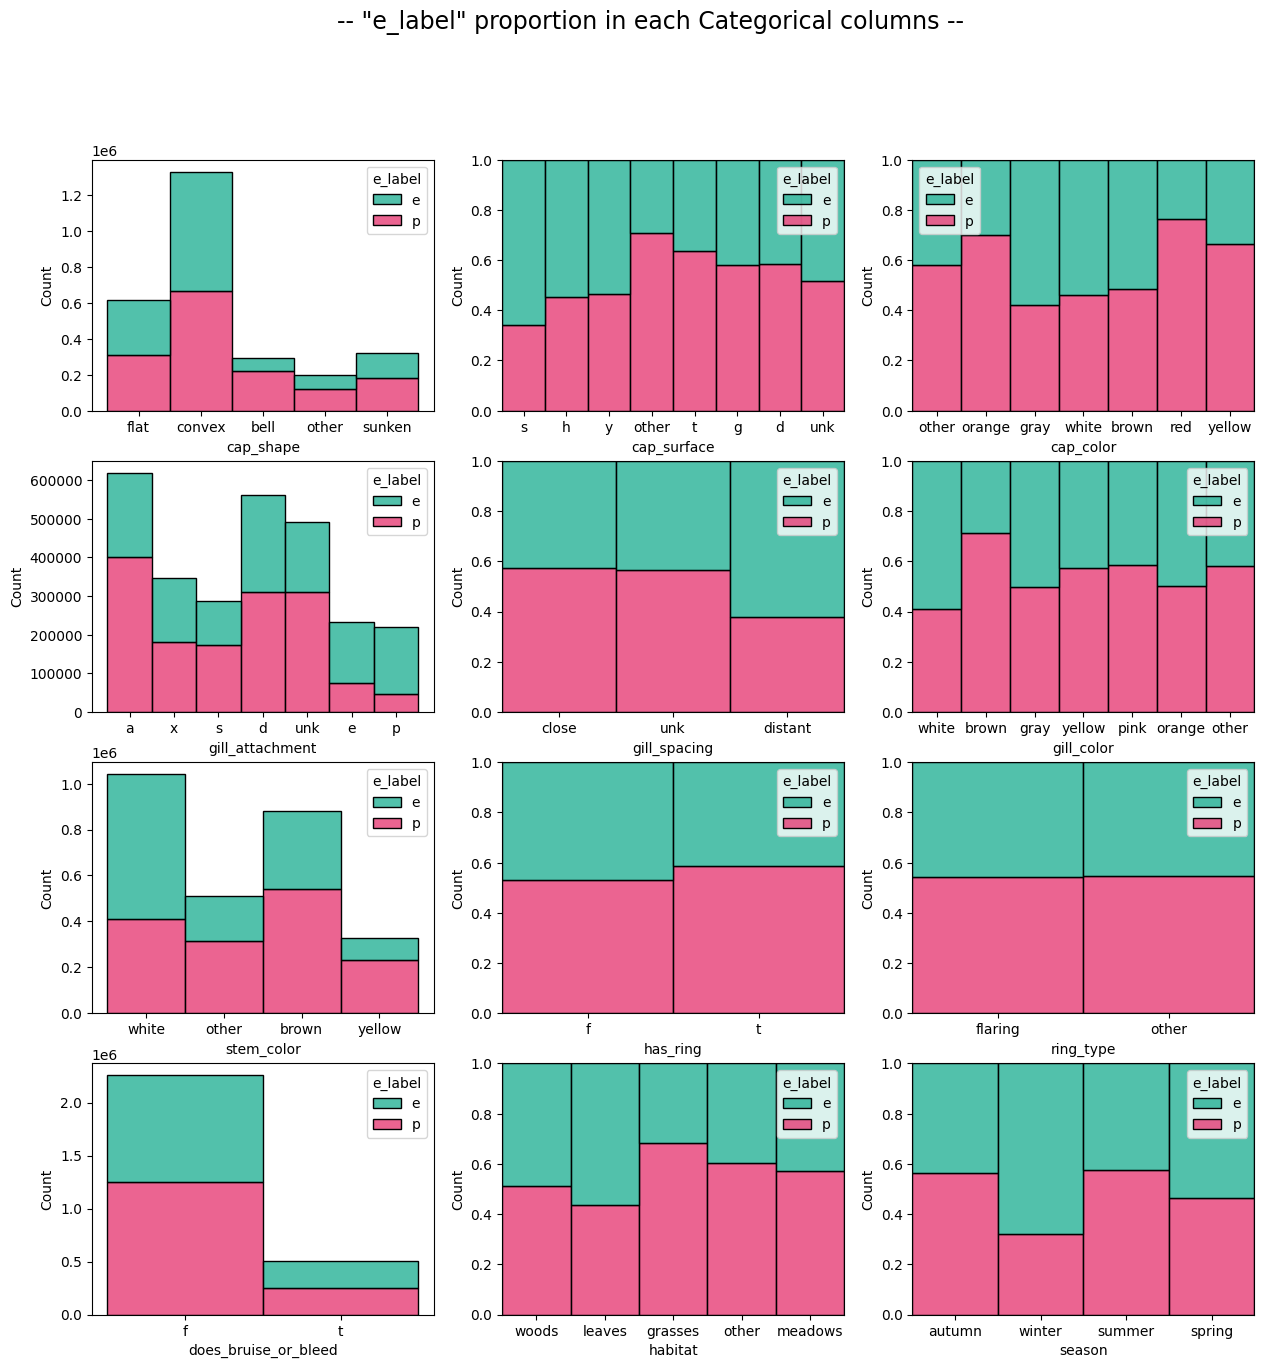

In [300]:
cat_cols = np.reshape(categorical_cols, (4,3))

# for col in categorical_cols:
f, axs = plt.subplots(4, 3, figsize=(15, 15))
f.suptitle('-- "e_label" proportion in each Categorical columns -- ', fontsize=17)
c_palette={'e':'#18ac8f', 'p':'#e5306d'}

for n, col in enumerate(cat_cols):
    sns.histplot(ax=axs[n,0], data=mdf, x =col[0], hue='e_label', multiple='stack', palette=c_palette)
    sns.histplot(ax=axs[n,1], data=mdf, x =col[1], hue='e_label', multiple='fill', palette=c_palette)
    sns.histplot(ax=axs[n,2], data=mdf, x =col[2], hue='e_label', multiple='fill', palette=c_palette)
